In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler 


### Importing Data

In [435]:
df = pd.read_csv('melb_data.csv')
df_test = df[['Price', 'Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']].copy()

### Handling NaN Value

In [436]:
df_test.dropna(how = 'all', axis = 1, inplace = True)

In [325]:
df_test.isna().sum()

Price        0
Distance     0
Car         62
Landsize     0
Rooms        0
Bedroom2     0
Bathroom     0
dtype: int64

In [437]:
df_test['Car'] = df_test.Car.fillna(0)

In [277]:
df_test.isna().sum()

Price       0
Distance    0
Car         0
Landsize    0
Rooms       0
Bedroom2    0
Bathroom    0
dtype: int64

In [349]:
df_test.head(10)

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,2.5,1.0,202.0,2,2.0,1.0
1,1035000.0,2.5,0.0,156.0,2,2.0,1.0
2,1465000.0,2.5,0.0,134.0,3,3.0,2.0
3,850000.0,2.5,1.0,94.0,3,3.0,2.0
4,1600000.0,2.5,2.0,120.0,4,3.0,1.0
5,941000.0,2.5,0.0,181.0,2,2.0,1.0
6,1876000.0,2.5,0.0,245.0,3,4.0,2.0
7,1636000.0,2.5,2.0,256.0,2,2.0,1.0
8,300000.0,2.5,1.0,0.0,1,1.0,1.0
9,1097000.0,2.5,2.0,220.0,2,3.0,1.0


### Check the Distribution

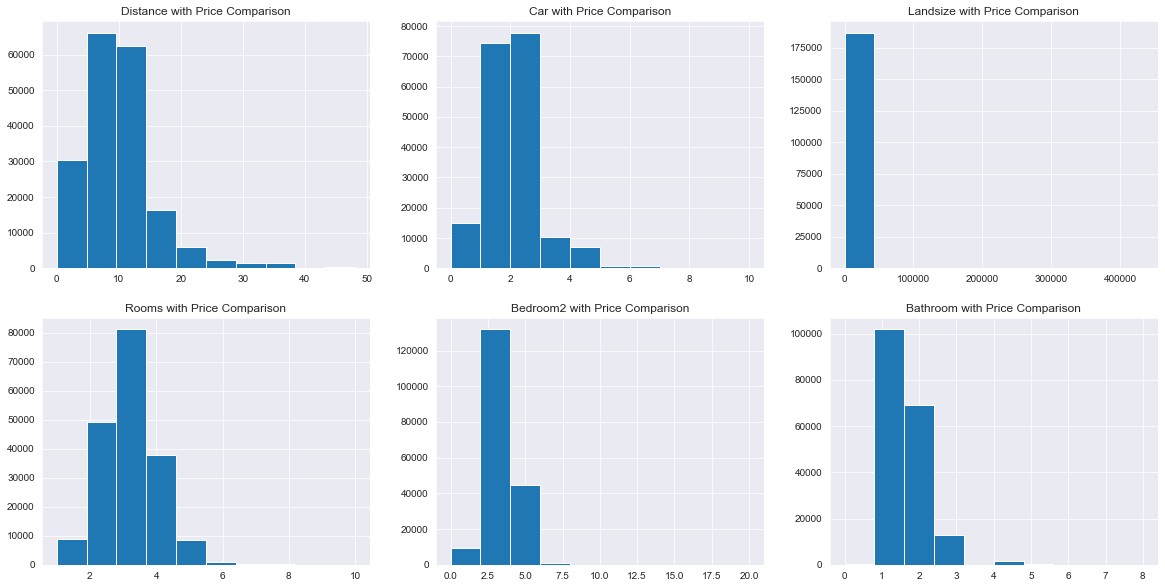

In [526]:
list_cols = ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(df_test[i], weights = np.log(df_test.Price))
    ax.set_title(i + ' with Price Comparison')

plt.show()

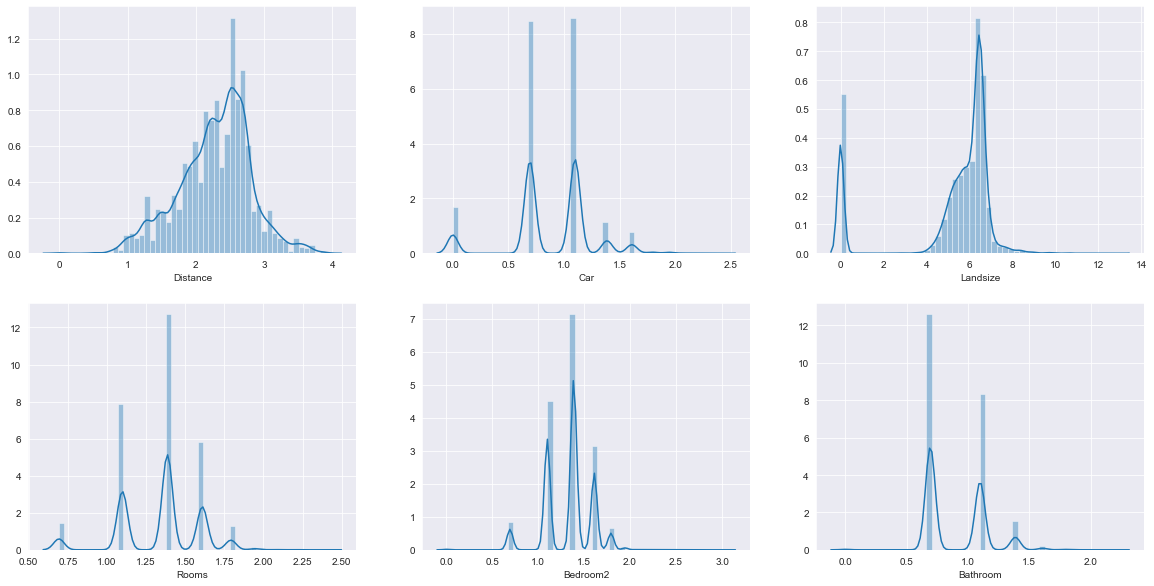

In [198]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    sns.distplot(np.log1p(df_test[i]), kde = True, ax = ax)

plt.show()


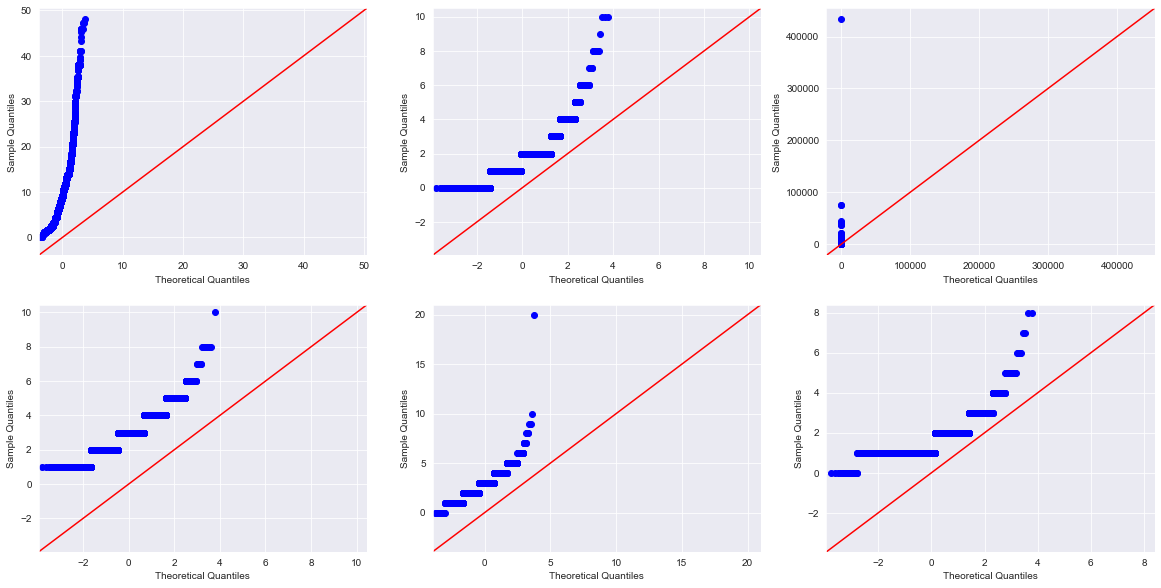

In [278]:
import statsmodels.api as sm
import pylab

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    sm.qqplot(df_test[i], line = '45', ax = ax)
pylab.show()

### Handling the Outliers

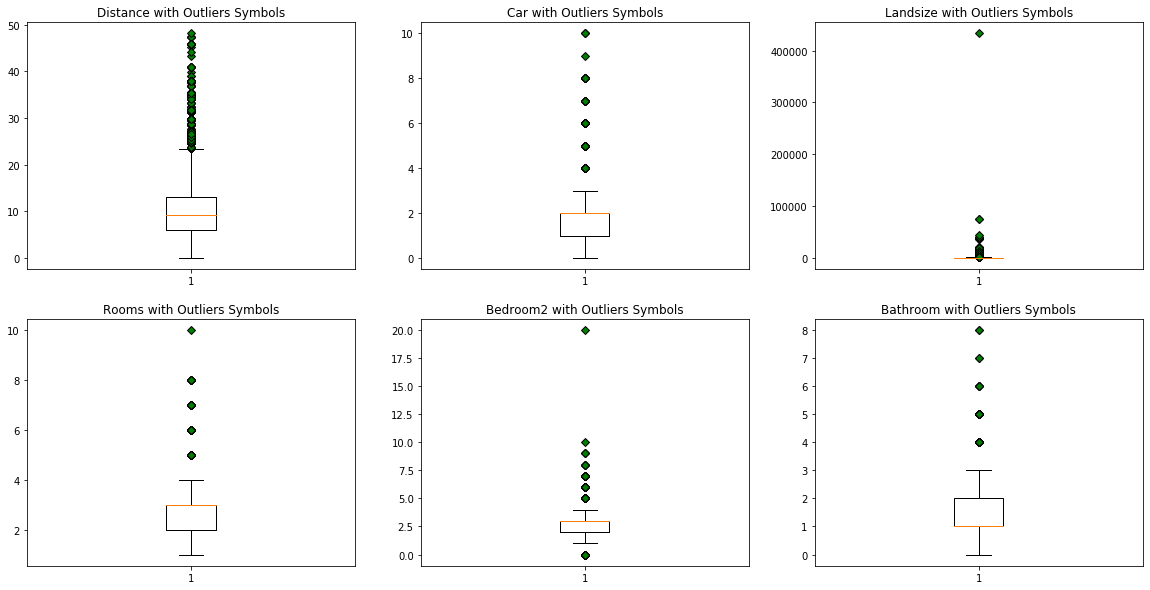

In [195]:
fig, axs = plt.subplots(2,3, figsize = (20,10))
green_diamond = dict(markerfacecolor='g', marker='D')

for ax, i in zip(axs.flat, list_cols):
    ax.boxplot(df_test[i], flierprops=green_diamond)
    ax.set_title(i + ' with Outliers Symbols')
plt.show()


In [480]:
melb = df_test[['Price', 'Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']]
    
Q1 = melb.quantile(0.25)
Q3 = melb.quantile(0.75)
IQR = Q3 - Q1

df_non_outlier = melb[~((melb < (Q1 - 1.5 * IQR)) | (melb > (Q3 + 1.5 * IQR))).any(axis=1)]

In [481]:
df_non_outlier.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,2.5,1.0,202.0,2,2.0,1.0
1,1035000.0,2.5,0.0,156.0,2,2.0,1.0
2,1465000.0,2.5,0.0,134.0,3,3.0,2.0
3,850000.0,2.5,1.0,94.0,3,3.0,2.0
4,1600000.0,2.5,2.0,120.0,4,3.0,1.0


### Check the Outlliers

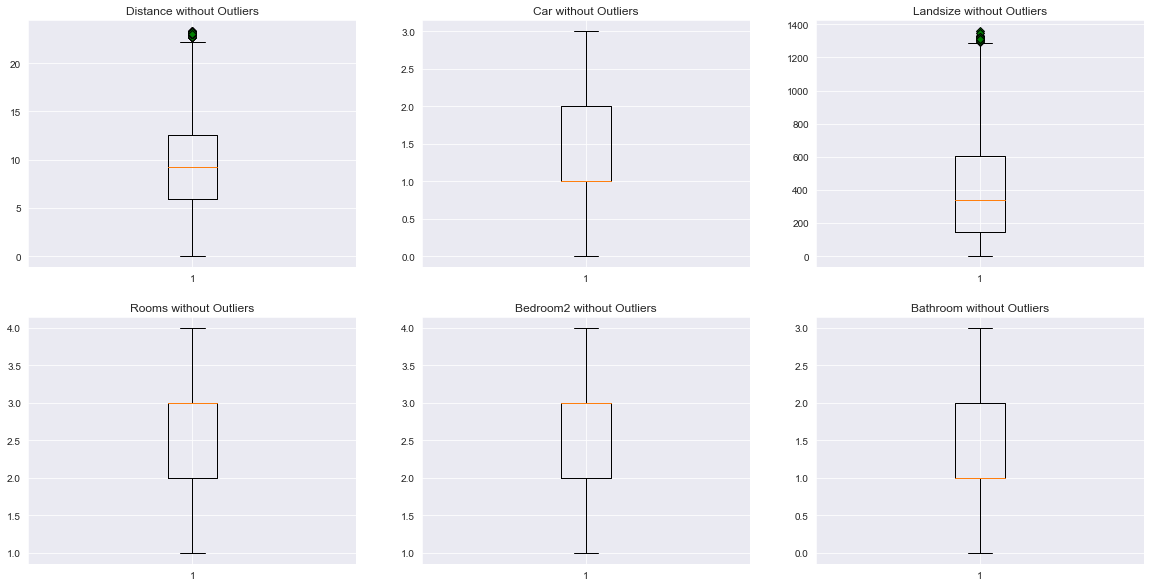

In [449]:
fig, axs = plt.subplots(2,3, figsize = (20,10))
green_diamond = dict(markerfacecolor='g', marker='D')

for ax, i in zip(axs.flat, list_cols):
    ax.boxplot(df_non_outlier[i], flierprops=green_diamond)
    ax.set_title(i + ' without Outliers')
plt.show()

In [404]:
## With Z Score

# from scipy import stats

# z = np.abs(stats.zscore(df2))
# filtered_entries = (z < 3).all(axis = 1)
# new_df = df2[filtered_entries]

## MinMaxScaler

In [482]:
def minMaxScl(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(df[col])),columns = [col])

    return df


In [527]:
df1 = df_test.copy()
df_MinMax_Scaled = minMaxScl(df1, ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'])

df_MinMax_Scaled.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,0.051975,0.1,0.000466,0.111111,0.10,0.125
1,1035000.0,0.051975,0.0,0.000360,0.111111,0.10,0.125
2,1465000.0,0.051975,0.0,0.000309,0.222222,0.15,0.250
3,850000.0,0.051975,0.1,0.000217,0.222222,0.15,0.250
4,1600000.0,0.051975,0.2,0.000277,0.333333,0.15,0.125


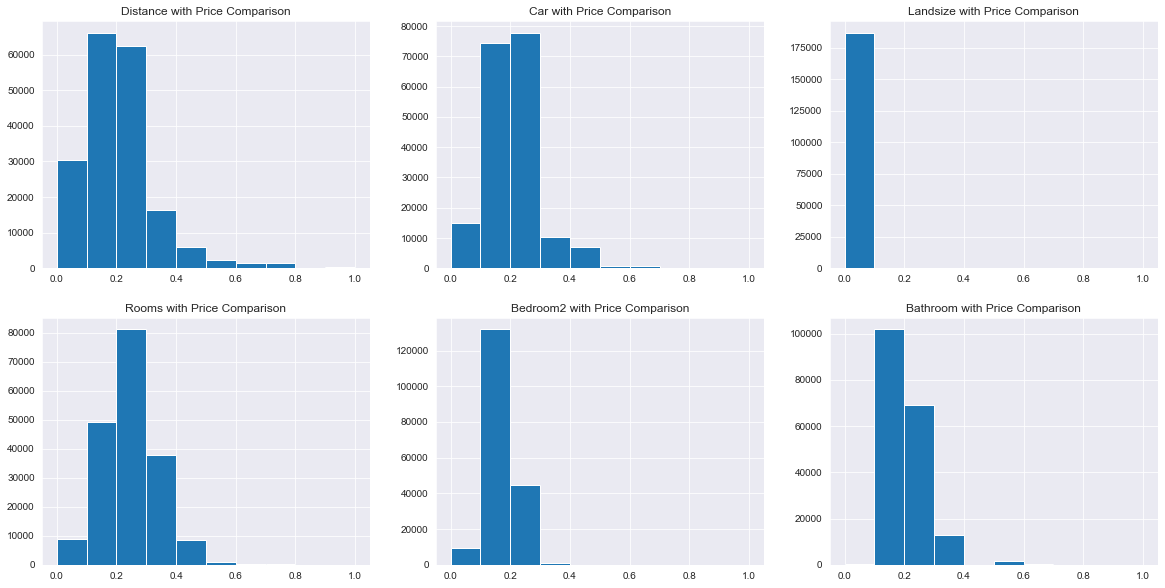

In [528]:
list_cols = ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(df_MinMax_Scaled[i], weights = np.log(df_MinMax_Scaled.Price))
    ax.set_title(i + ' with Price Comparison')

plt.show()

### MinMaxScaler without Outliers

In [530]:
df_scaled = minMaxScl(df_non_outlier, ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'])

df_scaled.head()

/Users/dickyalsyah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dickyalsyah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dickyalsyah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,0.107296,0.333333,0.148858,0.333333,0.333333,0.333333
1,1035000.0,0.107296,0.000000,0.114959,0.333333,0.333333,0.333333
2,1465000.0,0.107296,0.000000,0.098747,0.666667,0.666667,0.666667
3,850000.0,0.107296,0.333333,0.069270,0.666667,0.666667,0.666667
4,1600000.0,0.107296,0.666667,0.088430,1.000000,0.666667,0.333333


/Users/dickyalsyah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dickyalsyah/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


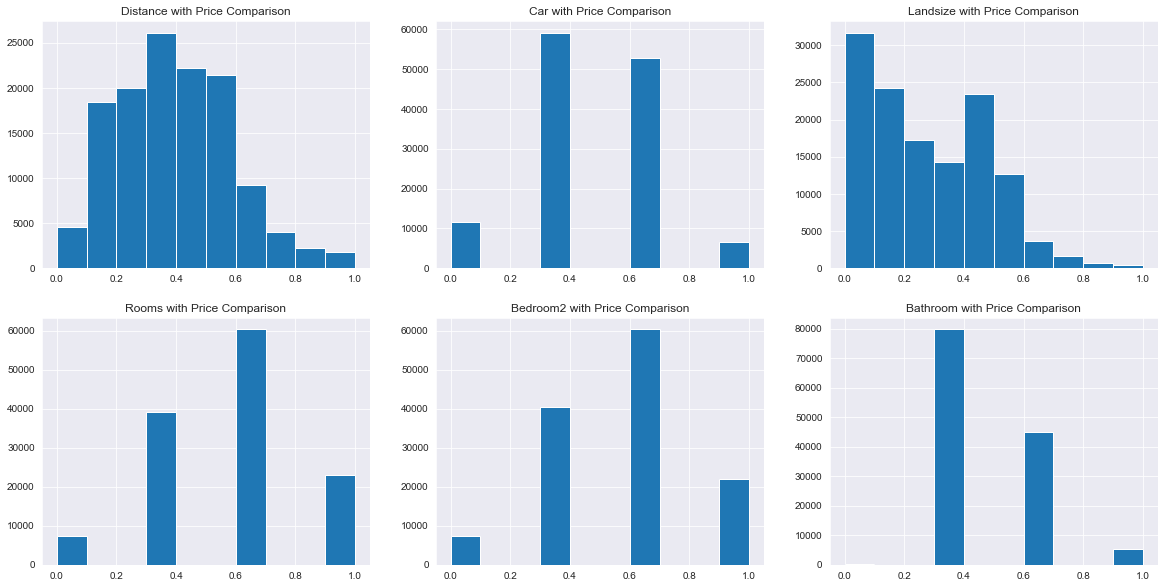

In [525]:
list_cols = ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(df_scaled[i], weights = np.log(df_scaled.Price))
    ax.set_title(i + ' with Price Comparison')

plt.show()

## StandardScale

In [484]:
def StdScaler(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(df[col])),columns = [col])

    return df


In [491]:
df2 = df_test.copy()
df_Std_Scaled = StdScaler(df2, ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'])
df_Std_Scaled.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,-1.301485,-0.623608,-0.089316,-0.981463,-0.947035,-0.772376
1,1035000.0,-1.301485,-1.658256,-0.100843,-0.981463,-0.947035,-0.772376
2,1465000.0,-1.301485,-1.658256,-0.106356,0.064876,0.088284,0.673367
3,850000.0,-1.301485,-0.623608,-0.116380,0.064876,0.088284,0.673367
4,1600000.0,-1.301485,0.411040,-0.109864,1.111216,0.088284,-0.772376


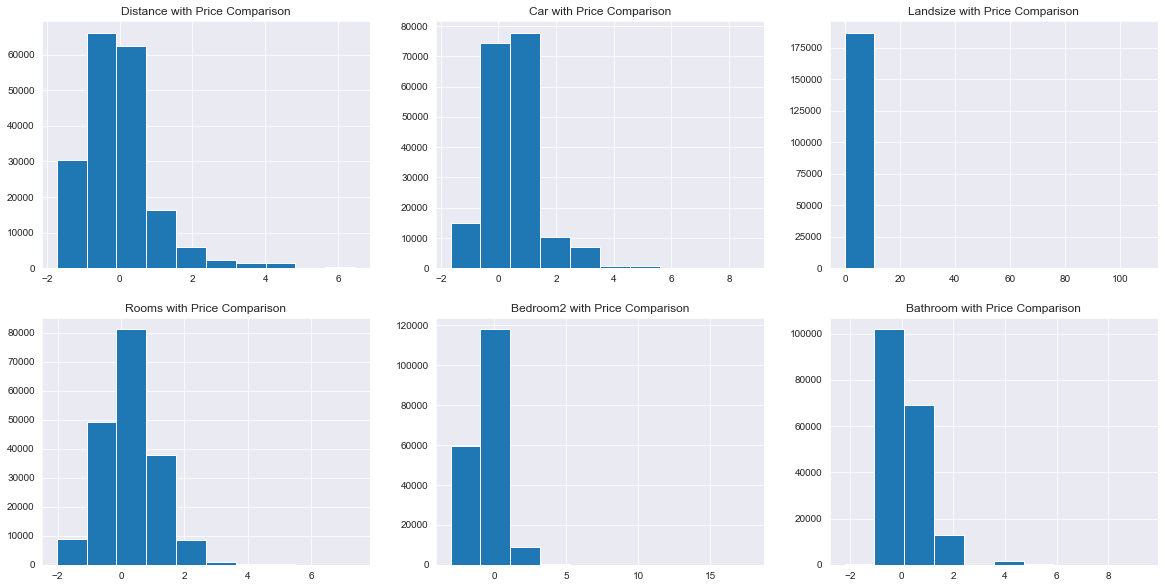

In [523]:
list_cols = ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(df_Std_Scaled[i], weights = np.log(df_Std_Scaled.Price))
    ax.set_title(i + ' with Price Comparison')

plt.show()

## RobustScale

In [486]:
def RobustScl(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(RobustScaler().fit_transform(pd.DataFrame(df[col])),columns = [col])

    return df


In [492]:
df3 = df_test.copy()
df_Robust_Scaled = RobustScl(df3, ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'])
df_Robust_Scaled.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
0,1480000.0,-0.971014,-1.0,-0.502110,-1.0,-1.0,0.0
1,1035000.0,-0.971014,-2.0,-0.599156,-1.0,-1.0,0.0
2,1465000.0,-0.971014,-2.0,-0.645570,0.0,0.0,1.0
3,850000.0,-0.971014,-1.0,-0.729958,0.0,0.0,1.0
4,1600000.0,-0.971014,0.0,-0.675105,1.0,0.0,0.0


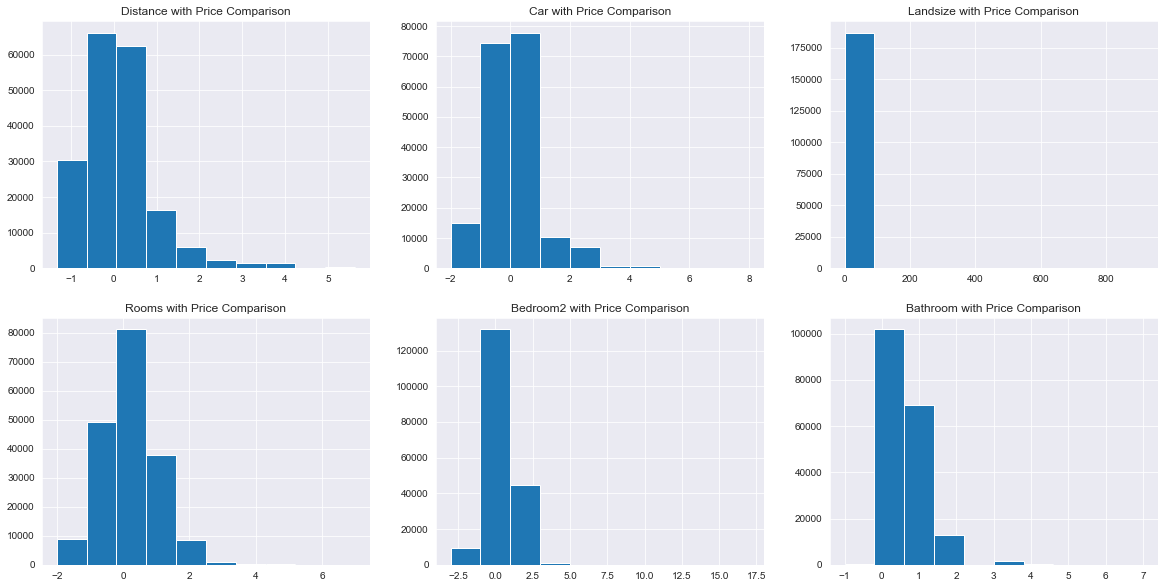

In [524]:
list_cols = ['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']

fig, axs = plt.subplots(2,3, figsize = (20,10))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(df_Robust_Scaled[i], weights = np.log(df_Robust_Scaled.Price))
    ax.set_title(i + ' with Price Comparison')

plt.show()